# Table of Contents:

1. [Import the packages](#Sec_1)                 

2. [Import the data](#Sec_2)                  
    - [Removing Duplicate rows from the data](#Sec_2_1)
    - [Statistical description of numerical columns](#Sec_2_2)
    - [Missing values](#Sec_2_3)               
     
3. [Company Column](#Sec_3)                     
    - [Brand name price comparison](#Sec_3_1)                       
    
4. [Laptop types](#Sec_4)          
    - [Price of laptops based on their types](#Sec_4_1)
    - [Price of laptops based on their segments](#Sec_4_2)       
5. [Laptop Screen size](#Sec_5)

<a class='anchor' id='Sec_1'></a>
## Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ipywidgets as widgets

<a class='anchor' id='Sec_2'></a>
## Import the data

In [3]:
# import the data

df = pd.read_csv('laptop_data.csv')

df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
# check the info of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


1. There are no null values in the data.
2. Only two numerical columns in the data 'Inches' and 'Price'.
3. The weight column should be a numerical column.
4. The Ram column should also be a numerical column.
5. 'Comapany', 'TypeName','OPSys' are categorical columns.
6. Rest of the columns contain string data.

<a class='anchor' id='Sec_2_1'></a>
#### Removing Duplicate rows from the data

In [5]:
# check for duplicate columns

df.duplicated(subset=df.columns[1:-1]).sum()

74

In [6]:
# percentage of duplicated columns

df.duplicated(subset=df.columns[1:-1]).mean() * 100

5.6792018419033

- There is atleast 5.5% of the data that is duplicated.

In [7]:
#check for duplicated entries

temp_df = df[df.duplicated(subset=df.columns[1:-1],keep=False)].sort_values('Price')
temp_df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1296,1296,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1268,1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1282,1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1272,1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
...,...,...,...,...,...,...,...,...,...,...,...,...
350,350,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,108020.9376
343,343,Lenovo,2 in 1 Convertible,13.9,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.4kg,111834.7200
301,301,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,113060.1600
186,186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,127712.1600


In [8]:
# Remove duplicates

df.drop_duplicates(subset=df.columns[1:-1],inplace=True)

In [9]:
# Delete the redundant index column

df.drop(columns=['Unnamed: 0'],inplace=True)

<a class='anchor' id='Sec_2_2'></a>
#### Statistical description of numerical columns

In [10]:
# check the details of the numerical columns

df.describe()

,Inches,Price
count,1229.000000,1229.000000
mean,15.019528,60504.540400
std,1.418213,37616.532991
min,10.100000,9270.720000
25%,14.000000,32127.840000
50%,15.600000,52480.800000
75%,15.600000,79653.600000
max,18.400000,324954.720000


1. The laptop size ranges from 10 inches to 18.5 inches. 
2. Most of the laptops are in the range of 15.6 inches
3. The average price range of laptops is around 60,000.

In [11]:
# columns in the data frame

df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [12]:
# round the price column to 2 decimal places

df['Price'] = df['Price'].round(2)

In [13]:
# shape of the data frame

df.shape

(1229, 11)

<a class='anchor' id='Sec_2_3'></a>
#### Missing values

In [14]:
# check for missing values 
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**There are no missing values in the data**

<a class='anchor' id='Sec_3'></a>
### Company Column

In [15]:
# different companies of laptop available

print('The number of laptop producers are:', df["Company"].nunique())

print('The name of producers of laptop are', df['Company'].unique())

print('*' * 100)

df['Company'].value_counts()

The number of laptop producers are: 19
The name of producers of laptop are ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
****************************************************************************************************


Dell         281
Lenovo       275
HP           263
Asus         146
Acer          98
MSI           49
Toshiba       45
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<a class='anchor' id='Sec_3_1'></a>
#### Brand name price comparison

In [16]:
# price comparison of different manufacturers

company_grp = df.groupby(by='Company')

company_func = company_grp['Price'].aggregate(func=['mean','median','count']).apply(lambda x : np.round(x,decimals=2)).sort_values('mean',ascending=False)

company_func

,mean,median,count
Company,,,
Razer,178282.49,154458.72,7
LG,111834.72,111834.72,3
MSI,94723.86,95850.72,49
Google,89386.08,83063.52,3
Microsoft,85903.79,83622.96,6
Apple,83340.50,71378.68,21
Huawei,75870.72,75870.72,2
Samsung,75308.32,87858.72,9
Toshiba,68379.55,64628.64,45


- Razer and LG have products more focussed on the higher end of the market.
- Asus and lenovo produces more budget segment laptops.
- Many of the lesser name chinese brands have more products in the lower segment of the market.

In [17]:
def company_price(est):
    sns.barplot(x='Company',y='Price',data=df,estimator=est,order=company_func.index)
    plt.xticks(rotation=90)
    if est == 'mean':
        plt.title('Mean Price with respect to company')
        plt.ylabel('Mean Price')
        plt.show()
    else:
        plt.title('Median Price with respect to company')
        plt.ylabel('Median Price')
        plt.show()
    
widgets.interactive(company_price,est=widgets.RadioButtons(options=['mean','median'],value='mean',description='Price with respect to company'))

interactive(children=(RadioButtons(description='Price with respect to company', options=('mean', 'median'), va…

<a class='anchor' id='Sec_4'></a>
### Laptops Types:

In [18]:
# check the different types of laptops

df['TypeName'].value_counts()

type_grp = df.groupby(by='TypeName')['Price'].aggregate(func=['mean','median'])

type_grp.sort_values('mean',ascending=False).apply(lambda x :np.round(x,decimals=2))

,mean,median
TypeName,,
Workstation,121497.53,110017.87
Gaming,93237.46,79840.08
Ultrabook,83014.52,79866.72
2 in 1 Convertible,68150.74,63349.92
Notebook,41802.61,36709.92
Netbook,35877.83,18914.40


In [19]:
# create a new segment column

def type_high_seg(x):
    if (x == 'Workstation') or (x == 'Gaming') or (x == 'Ultrabook'):
        return 'Yes'
    else:
        return 'No'
    
df['High_segment'] = df['TypeName'].apply(type_high_seg)

<a class='anchor' id='Sec_4_1'></a>
#### Price of laptops based on their types

In [20]:
def price_of_type(est):
    sns.barplot(x='TypeName',y='Price',data=df,estimator=est,order=type_grp.sort_values(by='mean',ascending=False).index)
    plt.xticks(rotation=90)
    if est == 'mean':
        plt.title('Mean Price with respect to type of laptop')
        plt.ylabel('Mean Price')
        plt.show()
    elif est == 'median':
        plt.title('Median Price with respect to type of laptop')
        plt.ylabel('Median Price')
        plt.show()
        
widgets.interactive(price_of_type,est=widgets.RadioButtons(options=['mean','median'],value='mean',description='Price with respect to type of laptop'))

interactive(children=(RadioButtons(description='Price with respect to type of laptop', options=('mean', 'media…

- Workstation laptops are the most expensive may be due to the hardware specs.
- Gaming laptops come second due to presence of better GPU's in them.
- Netbooks are the cheapest because they might be supporting low end hardware
- Ultrabooks are more expensive in comparison to 2 in 1 because of the thin profile.
- Notebooks are the most general section of laptops in the market.

<a class='anchor' id='Sec_4_2'></a>
#### Price of laptops based on their segments

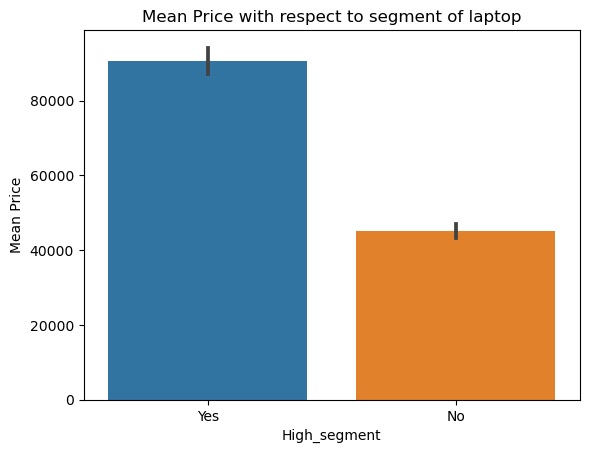

In [21]:
# mean price comparison of the high segment of laptops with the low segment

sns.barplot(x='High_segment',y='Price',data=df,estimator=np.mean,order=['Yes','No'])
plt.title('Mean Price with respect to segment of laptop')
plt.ylabel('Mean Price')
plt.show()

<a class='anchor' id='Sec_5'></a>
### Laptop Screen size

In [22]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
High_segment         object
dtype: object

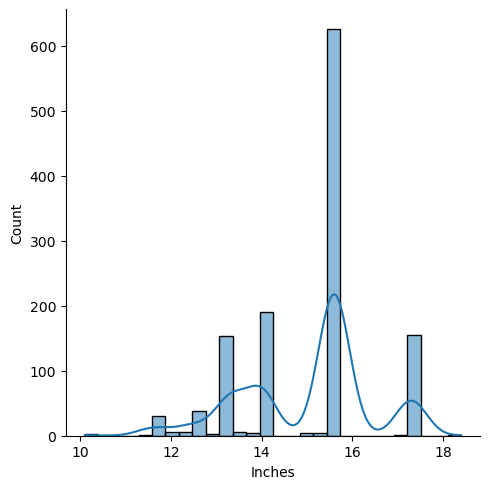

In [23]:
# inches of the laptop

sns.displot(x='Inches',data=df,kde='True')

The graph is trimodal in nature.     

Screen size of 13.5 inches, 15 inches and around 17 inches are prevalent.  

Some laptops are also available in screen sizes around and smaller than 10 inches and some larger than 18 inches are also available.

The graph appears to be left skewed

In [24]:
# check the skewness of inches column

df['Inches'].skew()

-0.40681777443836603

In [25]:
# check if the feature is normally distributed

from scipy.stats import shapiro

stats,p = shapiro(df['Inches'].values)

ci = 0.05
print(stats,p)
print()
if p < ci:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')

0.8777676224708557 5.299218435314823e-30

The data is not normally distributed


In [26]:
# check the correlation between screen size and price

df[['Inches','Price']].corr()

,Inches,Price
Inches,1.000000,0.067512
Price,0.067512,1.000000


- The Screen size is not very much correlated with the price of the laptops.

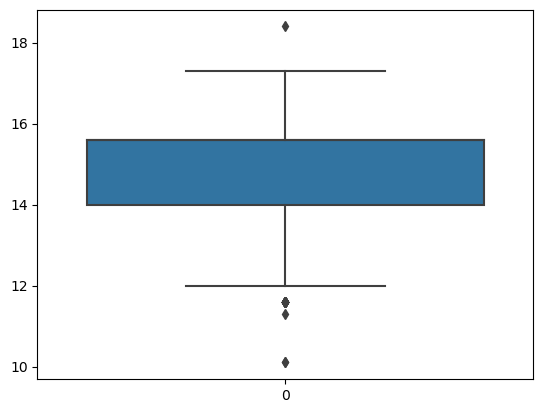

In [27]:
# outliers in the screen column

sns.boxplot(df['Inches'])
plt.show()

 - There appears to be a few outliers in the data.
 - Screen size can be binned into different sizes which might cap the outliers.

In [28]:
# Laptop having screen size greater than 18 inches

df.query('Inches > 18')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,High_segment
177,MSI,Gaming,18.4,Full HD 1920x1080,Intel Core i7 6920HQ 2.9GHz,32GB,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.4kg,149130.72,Yes


<AxesSubplot: xlabel='Inches', ylabel='Price'>

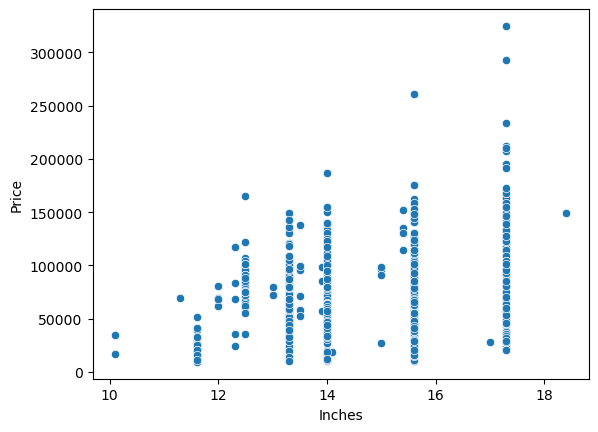

In [29]:
# relationship between screen size and price of the laptops

sns.scatterplot(x='Inches',y='Price',data=df)

- More expensive laptops are there in laptops with larger screen sizes.

In [30]:
screen_radio = widgets.RadioButtons(options=['mean','median'],value='mean',description='Price summary based on screen size')

In [31]:
def screen_estimate(est):
    sns.barplot(x='Inches',y='Price',data=df,estimator=est)
    plt.xticks(rotation='vertical')
    if est == 'mean':
                plt.title('Mean price of laptops based on Screen Size')
                plt.xlabel('Screen Size')
                plt.ylabel('Price of laptop')
                plt.show()
    elif est == 'median':
                plt.title('Median price of laptops based on Screen Size')
                plt.xlabel('Screen Size')
                plt.ylabel('Price of laptop')
                plt.show()
widgets.interactive(screen_estimate,est=screen_radio)                                       

interactive(children=(RadioButtons(description='Price summary based on screen size', options=('mean', 'median'…

In [32]:
# screen size value counts

df['Inches'].value_counts().sort_values(ascending=False)

15.6    625
14.0    189
17.3    155
13.3    154
12.5     38
11.6     31
12.0      6
13.5      6
12.3      5
15.0      4
15.4      4
13.9      4
10.1      2
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [33]:
# convert inches numerical to inches categorical column

bins = [10,12,13,14,15,17,19]
labels = [11.6,12.5,13.3,14,15.6,17.3]
df['Inches_bins'] = pd.cut(df["Inches"],bins,right=False,include_lowest=True,labels=labels)

In [34]:
price_range = range(100000,350000,50000)
def inches_price(price):
    sns.stripplot(x='Inches_bins',y='Price',data=df,jitter=0.2,
                  hue=np.where(df['Price']>price,
                               f'Greater than Rs. {price}',f'Less than Rs. {price}'))
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

widgets.interactive(inches_price,price=price_range)

interactive(children=(Dropdown(description='price', options=(100000, 150000, 200000, 250000, 300000), value=10…

- The bigger screen size the laptop has, the more expensive it is.
- The High segment category is more in number in larger laptops as compared to laptops having smaller screen size.

In [35]:
df.dtypes

Company               object
TypeName              object
Inches               float64
ScreenResolution      object
Cpu                   object
Ram                   object
Memory                object
Gpu                   object
OpSys                 object
Weight                object
Price                float64
High_segment          object
Inches_bins         category
dtype: object

<AxesSubplot: xlabel='Inches_bins', ylabel='Count'>

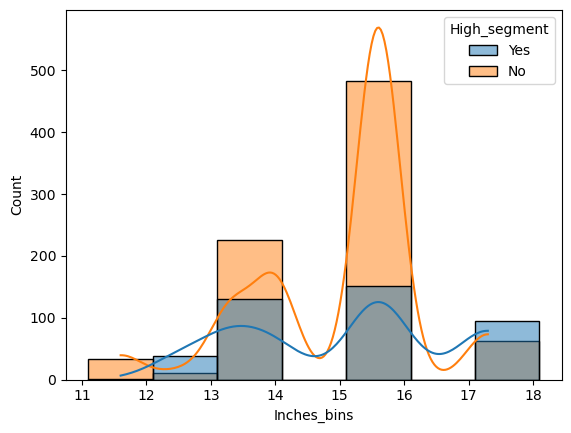

In [36]:
# Distribution of laptops based on screen size

sns.histplot(x='Inches_bins',data=df,hue='High_segment',bins=labels,multiple='layer',kde=True)

- The larger screen size laptops are more high end as compared to smaller sizes and more of these laptops are form the High segment.
- Lower screen sizes have lesser number of high end laptops.
- The Ultrabook category captures the lower screen sizes around 11 to 14 inches.
- The high end laptops in larger screen sizes are mainly the gaming laptops.

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

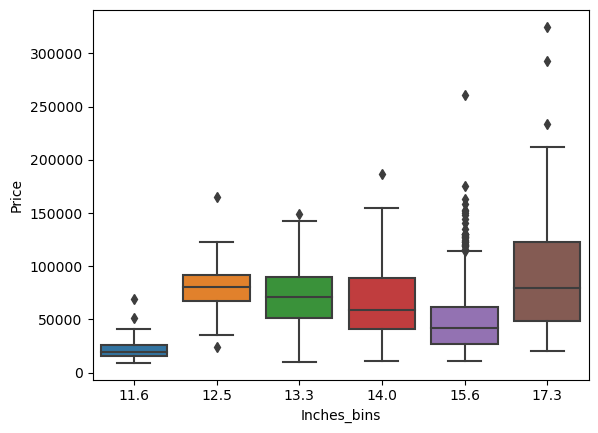

In [37]:
# plot box plots to check for outliers

sns.boxplot(x='Inches_bins',y='Price',data=df)

There are many expensive laptops in the 15 inch segment    
The 17 inch segment market is generally having expensive expensive products, but 3 products in the 17 inch segment seems to be outliers for their current segment.    
The median of the 12.5 inch and the 17.3 inch is nearly identical. 

In [38]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'High_segment',
       'Inches_bins'],
      dtype='object')

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

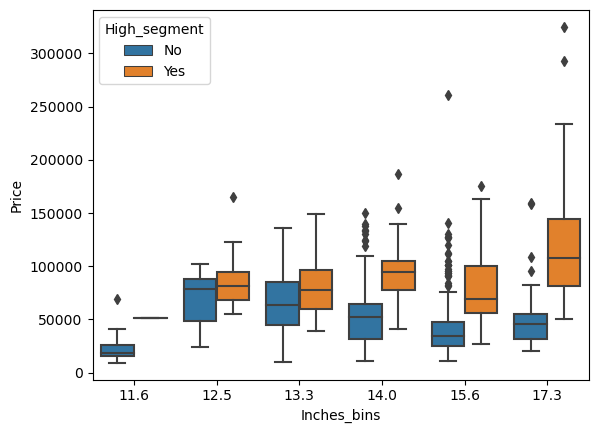

In [39]:
# check for types of laptops wrt to their screen size

sns.boxplot(x='Inches_bins',y='Price',data=df,hue='High_segment',hue_order=['No','Yes'])

<AxesSubplot: xlabel='Inches_bins', ylabel='Price'>

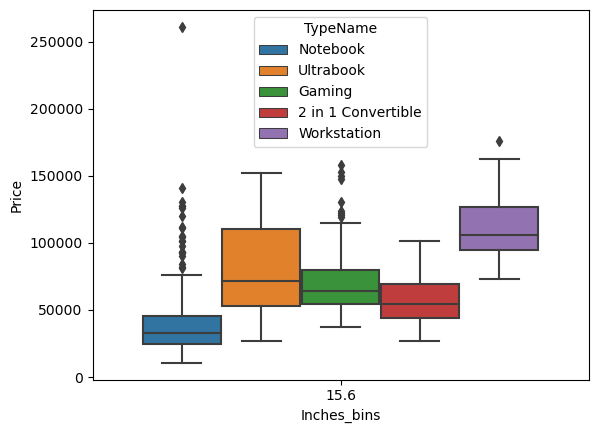

In [40]:
# outliers based on type of laptop in the 15.6 inches screen size

df_15_inch = df[df['Inches_bins'] == 15.6].copy()
df_15_inch

sns.boxplot(x='Inches_bins',y='Price',data=df_15_inch,hue='TypeName',order=[15.6])

In [41]:
df['Inches_bins'].value_counts().sort_index()

11.6     34
12.5     49
13.3    166
14.0    190
15.6    633
17.3    157
Name: Inches_bins, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1229 non-null   object  
 1   TypeName          1229 non-null   object  
 2   Inches            1229 non-null   float64 
 3   ScreenResolution  1229 non-null   object  
 4   Cpu               1229 non-null   object  
 5   Ram               1229 non-null   object  
 6   Memory            1229 non-null   object  
 7   Gpu               1229 non-null   object  
 8   OpSys             1229 non-null   object  
 9   Weight            1229 non-null   object  
 10  Price             1229 non-null   float64 
 11  High_segment      1229 non-null   object  
 12  Inches_bins       1229 non-null   category
dtypes: category(1), float64(2), object(10)
memory usage: 158.5+ KB


In [43]:
labels

[11.6, 12.5, 13.3, 14, 15.6, 17.3]

In [44]:
df['Inches_bins'] == 15.6

0       False
1       False
2        True
3        True
4       False
        ...  
1269     True
1270    False
1271    False
1272    False
1273     True
Name: Inches_bins, Length: 1229, dtype: bool

In [45]:
multi_select = widgets.SelectMultiple(options=labels,value=(15.6,),description='Screen Size')

In [46]:
def plot_boxplots(bins):
    for l in list(bins):
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        df_filter = df[df['Inches_bins'] == l]
        sns.boxplot(x='Inches_bins',y='Price',data=df_filter,hue='TypeName',order=[l])
        
        plt.subplot(1,2,2)
        sns.boxplot(x='Inches_bins',y='Price',data=df_filter,order=[l])
        plt.show()

In [47]:
widgets.interactive(plot_boxplots,bins=multi_select)

interactive(children=(SelectMultiple(description='Screen Size', index=(4,), options=(11.6, 12.5, 13.3, 14, 15.…

- Many laptops in the Notebook and Gaming laptops category have a higher price then the rest.
- The workstation laptops already have a high price as compared to other laptops in the same screen size.
- All different screen sized laptops have some data points as extreme outliers in them.

This might be due to presence or absence of high end GPU's in the laptop or can be due to other powerful hardware present.

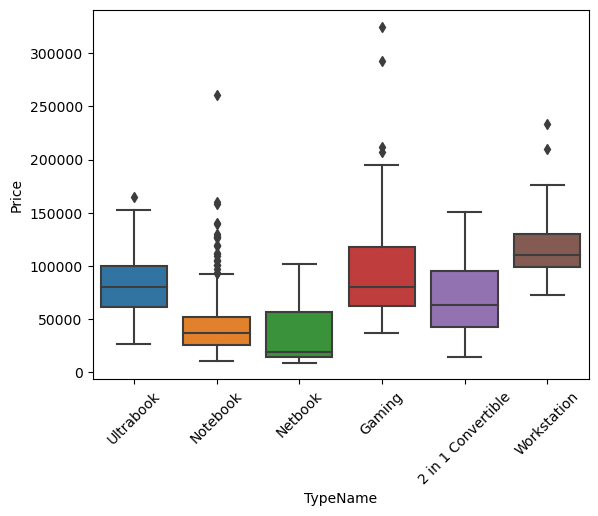

In [48]:
# check for outliers by Type of the laptop

sns.boxplot(x='TypeName',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

##### Extreme outliers in the data

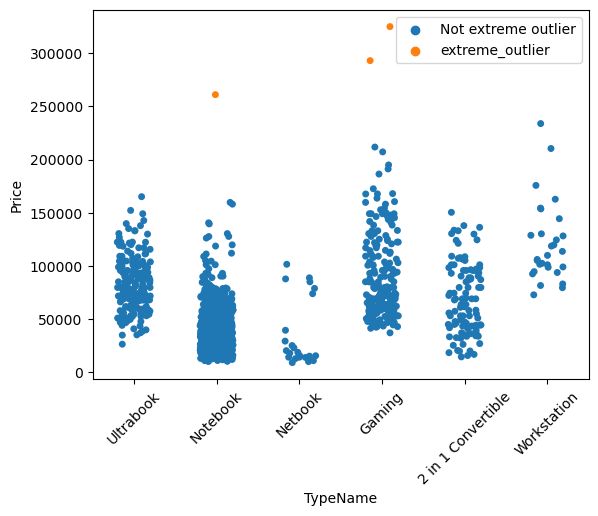

In [49]:
# check for the extreme outliers in the data
df_extreme_outliers = df[df['Price'] >= 250000]
df_extreme_outliers

sns.stripplot(x='TypeName',y='Price',data=df,hue=np.where(df['Price'] >= 250000,'extreme_outlier','Not extreme outlier'),jitter=0.2)
plt.xticks(rotation=45)
plt.show()

- In the later stages we can remove these extreme outliers.
- The other outliers can be capped through the winsorization method.

We may have to consider removing these outliers from our data as they are extreme outliers and can effect our pedictions

In [50]:
# Percantage of extreme outlers data points vs length of df

percentage_outliers = (df_extreme_outliers.shape[0] / df.shape[0]) * 100
percentage_outliers

0.24410089503661514

The percentage of extreme outleirs is very less and it is better to remove these data points as they will affect our analysis.

In [51]:
# outliers to be capped

def mark_outliers(group):
    upper_limit = group['Price'].quantile(0.99)
    group['is_outlier'] = np.where((group['Price'] > upper_limit),1,0)
    return group

outliers_type = df.groupby('TypeName',group_keys=False).apply(mark_outliers)

In [52]:
# percentage of outliers(99th percentile) in the data based on type of laptop
temp = outliers_type['is_outlier'].mean() * 100

print('The percentage of outliers based on the type of laptops-{}%'.format(np.round(temp,2)))

The percentage of outliers based on the type of laptops-1.22%


In [53]:
# count of outliers based on laptop type

outliers_type['is_outlier'].sum()

15

In [54]:
# percentage of outliers in the type category:

outliers_type.groupby('TypeName')['is_outlier'].mean()*100

TypeName
2 in 1 Convertible    1.818182
Gaming                1.020408
Netbook               4.347826
Notebook              1.027900
Ultrabook             1.052632
Workstation           3.448276
Name: is_outlier, dtype: float64

- On an average around 2 to 4% of the data points in every type category is an outlier. Removal of these data points will result in data loss.
- One way to do is to cap the higher prices but it will also result in the removal of high price laptops.

##### **Conclusion**     
The best approach for such data types is to leave them as it is and only remove the ones that are very extreme and can actually disturb the analysis.
Another best approach would be to use models that are somewhat robust to outliers as it might give us good results.

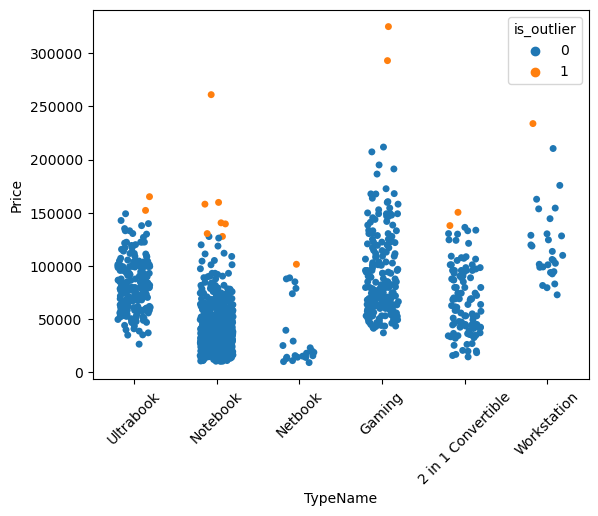

In [55]:
# check for the outliers in the data above the 99th percentile

sns.stripplot(x='TypeName',y='Price',data=outliers_type,hue='is_outlier',jitter=0.2)
plt.xticks(rotation=45)
plt.show()

In [56]:
# 99th percentile outliers for the Screen Inches column

def mark_outliers(group):
    upper_limit = group['Price'].quantile(0.99)
    group['is_outlier'] = np.where((group['Price'] > upper_limit),1,0)
    return group

outliers_screen = df.groupby('Inches_bins',group_keys=False).apply(mark_outliers)

In [57]:
# percentage of outlers(99th percentile) in the data based on screen size

temp2 = outliers_screen['is_outlier'].mean() * 100
print('The percentage of outliers in the data based on screen size is -{}%'.format(np.round(temp2,2)))

The percentage of outliers in the data based on screen size is -1.22%


In [58]:
# count of outliers based on screen size
outliers_screen['is_outlier'].sum()

15

In [59]:
# percentage of outliers in the screen size category:

outliers_screen.groupby('Inches_bins')['is_outlier'].mean()*100

Inches_bins
11.6    2.941176
12.5    2.040816
13.3    1.204819
14.0    1.052632
15.6    1.105845
17.3    1.273885
Name: is_outlier, dtype: float64

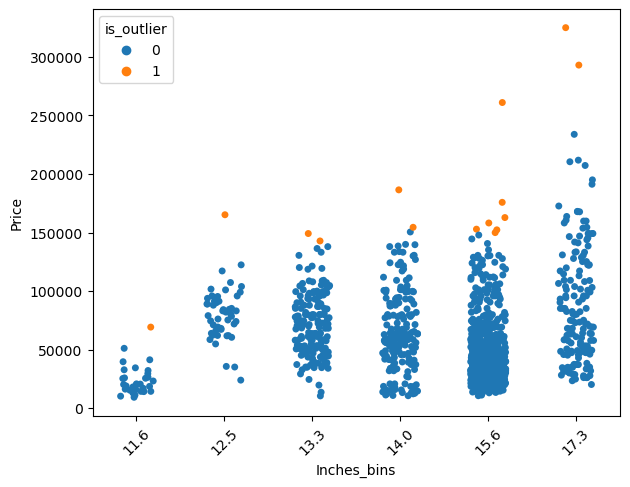

In [60]:
# 99th percentile outliers based on the screen size

sns.stripplot(x='Inches_bins',y='Price',data=outliers_screen,jitter=0.2,hue='is_outlier')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

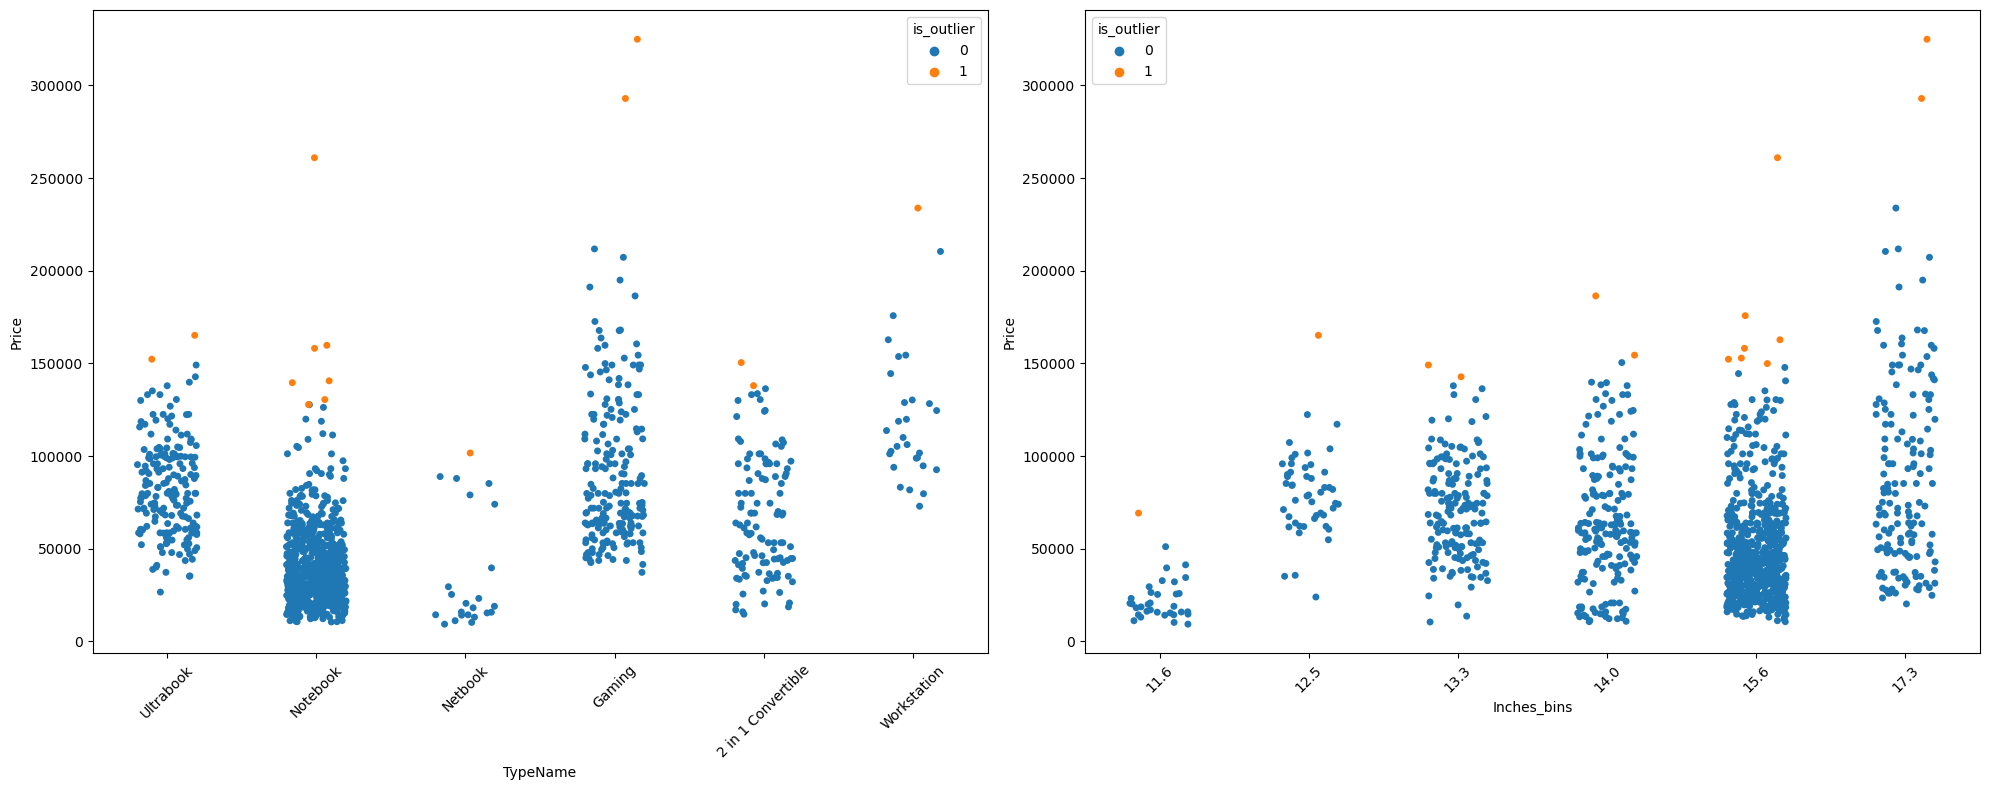

In [61]:
# 99th percentile outliers based on screen size and type of the laptop
# plot side by side

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.stripplot(x='TypeName',y='Price',data=outliers_type,hue='is_outlier',jitter=0.2)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.stripplot(x='Inches_bins',y='Price',data=outliers_screen,jitter=0.2,hue='is_outlier')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

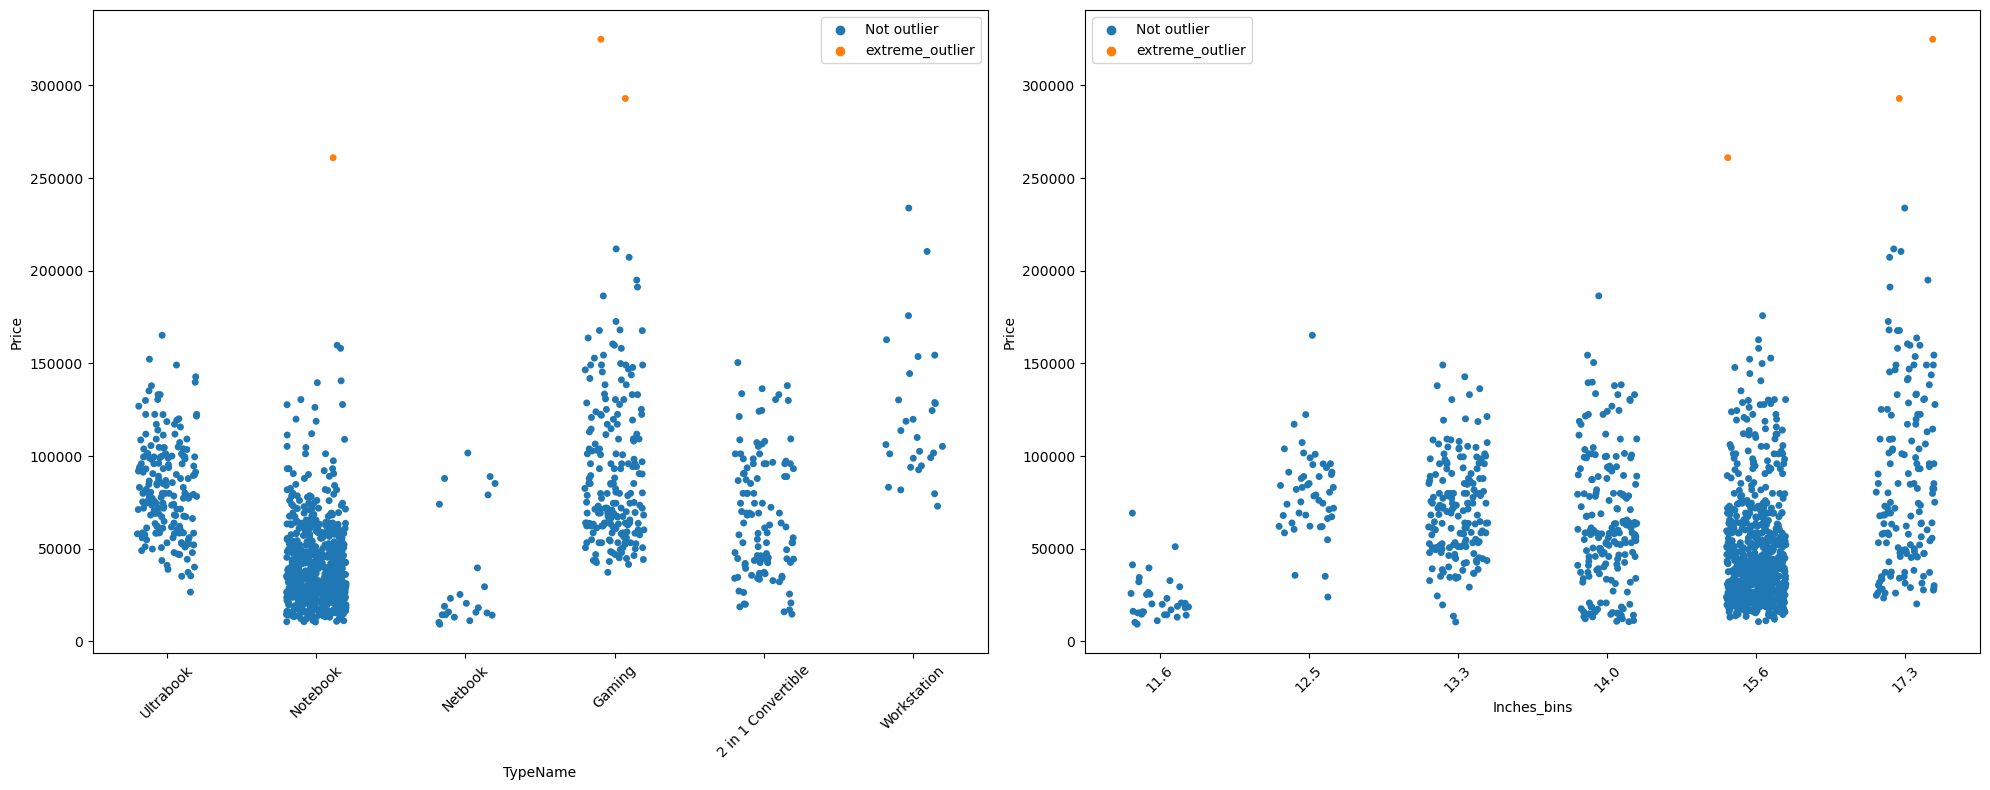

In [62]:
# mark only the extreme outliers

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.stripplot(x='TypeName',y='Price',data=df,hue=np.where(df['Price'] >= 250000,'extreme_outlier','Not outlier'),jitter=0.2)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.stripplot(x='Inches_bins',y='Price',data=df,jitter=0.2,hue=np.where(df['Price'] >= 250000,'extreme_outlier','Not outlier'))
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

In [75]:
def transform(percentile):
    grp = df.groupby('TypeName',group_keys=False)
    def outliers(group):
        limit = group['Price'].quantile(percentile)
        group['outlier'] = np.where(group['Price'] > limit,1,0)
        return group
    trans = grp.apply(outliers)
    display(trans.groupby('TypeName')['outlier'].mean() * 100)
    sns.stripplot(x='TypeName',y='Price',data=trans,hue='outlier',jitter=0.2)
    plt.title(f'The ouliers in data based on percentile - {percentile}')
    plt.xticks(rotation=45)
    plt.show()

    
widgets.interactive(transform,percentile=[0.95,0.96,0.97,0.98,0.99])

interactive(children=(Dropdown(description='percentile', options=(0.95, 0.96, 0.97, 0.98, 0.99), value=0.95), …

### Screen resolution

In [ ]:
# Screen resolutions of high priced laptops

df[['TypeName','ScreenResolution',"Price"]].sort_values(by='Price',ascending=False).head(10)

In [ ]:
# Screen resolutions opf lower priced laptops.

df[['TypeName','ScreenResolution',"Price"]].sort_values(by='Price',ascending=False).tail(10)

In [ ]:
# screen resolutions column value counts

df['ScreenResolution'].value_counts()

In [ ]:
# Extract screen resolution info

import re

def sep_resolution(text):
    pattern = re.compile('\d{3,}')
    resolution = pattern.findall(text)
    return resolution

df['Horizontal_resolution'] = df['ScreenResolution'].apply(sep_resolution).str.get(0)
df['Vertical_resolution'] = df['ScreenResolution'].apply(sep_resolution).str.get(1)

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df[['ScreenResolution','Horizontal_resolution','Vertical_resolution']].sample(30)

In [ ]:
# convert to numerical columns

df['Horizontal_resolution'] = df['Horizontal_resolution'].astype('int32')
df['Vertical_resolution'] = df['Vertical_resolution'].astype('int32')

In [ ]:
df.dtypes

In [ ]:
# create a new higher resolution displays column
def create_high_definition(number):
    if number >= 1080:
        return True
    else:
        return False
    
df['High_definition'] = df['Vertical_resolution'].apply(create_high_definition)

In [ ]:
# do value counts on high_res displays

df['High_definition'].value_counts(normalize=True)

In [ ]:
# realtionship between Full HD screens and High segment laptops

sns.countplot(x='High_definition',data=df,hue="High_segment")

##### Conclusions:

Most of the laptops in the high segment support displays having Full HD resolution and some even have displays of high resolutions.    
The laptops that do not support Full HD or higher are mostly from the lower segment. These are from the netbook, notebook type laptops.

In [ ]:
# HD resolution in relation to the type of laptop

sns.countplot(x='TypeName',data=df,hue='High_definition',hue_order=[True,False])
plt.xticks(rotation=45)
plt.show()

- The Ultrabooks and thin and light convertibles have higher ratio of high resolution displays.   
- Netbook segment because it is the cheapest option has very less high resolution displays.
- Gaming and Workstation laptops have only high resolution displays in them.
- The notebook category has a mixed variety of resolutions.

In [ ]:
# screen that are touchscreen

df[df['ScreenResolution'].str.contains('Touchscreen')]['ScreenResolution']

In [ ]:
def has_touchscreen(text):
  if "Touchscreen" in text.split(' '):
    return True
  else:
    return False


In [ ]:
# Make touchscreen column

df['Has_touchscreen'] = df['ScreenResolution'].apply(has_touchscreen)

In [ ]:
df

In [ ]:
df[['ScreenResolution','Has_touchscreen']].sample(30)

In [ ]:
df['ScreenResolution'].str.contains('Touchscreen').sum()

In [ ]:
df['Has_touchscreen'].sum()

In [ ]:
def is_ips(text):
  if 'IPS' in text.split(' '):
    return True
  else:
    return False


In [ ]:
# check if the display is IPS

df['Is_IPS'] = df['ScreenResolution'].apply(is_ips)

In [ ]:
df.columns

In [ ]:
# relationship between the price of diff latop types having high definition and having IPS panels.

df.pivot_table(values='Price',index='TypeName',columns=['Is_IPS','High_definition'])

- Having a High Definition display has more impact on the price as compared to having an IPS Panel display.

In [ ]:
df.pivot_table(values='Price',index='TypeName',columns=['Is_IPS','High_definition']).plot(kind='bar')

### CPU

In [ ]:
# Take information out of the CPU column

df['Cpu'].value_counts().sample(50).sort_values(ascending=False)

In [ ]:
def cpu_brand(text):
  if ('Intel') in text.split(' '):
    return 'Intel'
  elif "AMD" in text.split(' '):
    return 'AMD'
  else:
    return 'Others'

df['Cpu_Brand'] = df['Cpu'].apply(cpu_brand)

In [ ]:
df[['Cpu','Cpu_Brand']].sample(60)

In [ ]:
df['Cpu_Brand'].value_counts()

In [ ]:
# counts of brands of CPU

sns.countplot(x='Cpu_Brand',data=df)

- Majority of the laptops in the market are of Intel and only a few of them are of AMD.

**As we have only one CPU that is of other brand we can remove this row as this is creating one extra class for only 1 data point and will increase the chances of overfitting.** 
- This 1 data point will also increase the problem of class imbalance in the brand column.

In [ ]:
df[df['Cpu_Brand'] == 'Others']

In [ ]:
# drop the others cpu brand row

others_index =  df[df['Cpu_Brand'] == 'Others'].index

df.drop(index=others_index,inplace=True)

In [ ]:
df['Cpu_Brand'].value_counts()

In [ ]:
def cpu_model(text):
  cpu_model_pattern = re.compile('i\d{1}')
  if len(cpu_model_pattern.findall(text)) > 0:
    return (cpu_model_pattern.findall(text)[0])
  else:
    return 'Others'

df['Cpu_model'] = df['Cpu'].apply(cpu_model)
df['Cpu_model']

In [ ]:
df[['Cpu','Cpu_model']].sample(70)

In [ ]:
def clock_freq(text):
  pattern = re.compile('\d{1,}\.*\d*GHz')

  out = pattern.findall(text)[0]
  return out.replace('GHz','')

df['Cpu_clock_freq'] = df['Cpu'].apply(clock_freq)


In [ ]:
df[['Cpu','Cpu_clock_freq']].sample(60)

In [ ]:
# create a new CPU model column

df['Cpu_model'] = df['Cpu_Brand'] + ' ' + df['Cpu_model']

df[['Cpu','Cpu_model']]

In [ ]:
df['Cpu_model'].value_counts()

In [ ]:
# mean price comparison between different CPU models.

sns.barplot(x='Cpu_model',y='Price',data=df,estimator=np.mean)

- The intel core i7 models are generally found in higher price range of laptops
- The intel core i5 captures the middle price segment of the market
- AMD,intel core i3 and other intel CPU's capture the lower end of the market with mean price lower than 30000.

In [ ]:
df.dtypes

In [ ]:
# convert Cpu clock frequency to float

df['Cpu_clock_freq'] = df['Cpu_clock_freq'].astype(float)

In [ ]:
# plot the distribution of clock frequencies

sns.histplot(x='Cpu_clock_freq',data=df,kde=True)

plt.show()

The clock frequency distribution shows that the modern day CPU's have clock frequency greater than 2 GHz and the distribution seems to be skewed to the left.

In [ ]:
df['Cpu_clock_freq'].skew()

In [ ]:
# check for the normality of  clock freq column

from scipy.stats import shapiro

stat,pval = shapiro(df['Cpu_clock_freq'].values)

ci = 0.05

if pval > ci:
    print('The column has gaussian distribution, failed to reject the null hypothesis')
else:
    print('The column is not normally distributed, failed to accept the null hypothesis')

In [ ]:
# check for outliers in the clock frequency column

sns.boxplot(x='Cpu_clock_freq',data=df)

In [ ]:
# cpu clock frequency lower than 1 GHz

low_cpu_speed = df[df['Cpu_clock_freq'] < 1]
low_cpu_speed

These outliers are not at the extreme end of the boxplot. We have to consider some more analysis on these data points before taking any action.

In [ ]:
df['Cpu_clock_freq'].quantile(0.01)

In [ ]:
# outliers based on the type of laptop

sns.boxplot(x='TypeName',y='Cpu_clock_freq',data=df)

plt.xticks(rotation=45)
plt.show()

In [ ]:
# relation of CPU clock speeds with price based on type of laptops

sns.scatterplot(x='Cpu_clock_freq',y='Price',data=df,hue='TypeName')
plt.show()

In [ ]:
# relation of CPU clock speeds with price based on segmentation

sns.scatterplot(x='Cpu_clock_freq',y='Price',data=df,hue='High_segment')
plt.show()

In [ ]:
# laptops with cpu clock frequency greater than 3.5

df.query('Cpu_clock_freq > 3.5')

### RAM

In [ ]:
df['Ram'] = df['Ram'].apply(lambda x : x.replace('GB',''))

In [ ]:
df['Ram'] = df['Ram'].astype('int')

In [ ]:
df['Ram'].value_counts()

- The most widely used RAM capacities are in the range of 4, 8 and 16 GB.
- There is one laptop that even supports 64 GB RAM.
- RAM sizes in multiple of 4 and 8 are more commonly used. The RAM capacities are increased by bunching up these sticks together to increase the RAM capacity.

In [ ]:
type_grp = df.groupby('High_segment')

type_grp['Ram'].value_counts(normalize=True) * 100

**Low segment** :   
In the lower segment of the laptops 4 and 8GB RAM capacities hold the highest share in configurations.    
There are a few laptops in this segment that supports 16GB of RAM.   
This is the only segment that has some laptops using 2GB RAM capacity as well, which is considered low to run modern softwares and applications.

**High Segment**   
In the high segment the 4, 8 and 16 GB RAM capacities are the norm.(mainly 8 and 16 GB)    
There are some laptops that support 32 and 64 GB Ram as well.
There is no 2GB RAM laptops in this category.  


In [ ]:
# RAM capacity counts in different segments of laptops

sns.countplot(x='Ram',data=df,hue='High_segment',order=np.sort(df['Ram'].unique()),hue_order=['No','Yes'])
plt.legend(loc=1)
plt.show()

- In lower end of the segment the 4GB and the 6GB capacity are more prevelant.   
- In the higher end of the segment the 16 GB and upwards of memory is used.
- 8 GB RAM is still used in most of the laptops.

In [ ]:
# mean price of laptops wrt RAM capacity

sns.barplot(x='Ram',y='Price',data=df)
plt.show()

**RAM capacities have direct relationship with the mean price of laptops. Both features show positive correlation.**    
As the RAM capacity increases so do the mean price of the laptops increases.

In [ ]:
df[['Ram','Price']].corr()

- RAM Capacity is an important feature in predicting the price of the laptop. 
- Shows are very high positive correlation.

In [ ]:
df['TypeName'].nunique()

In [ ]:
# Price wrt to RAM capacity for different Types of laptops

sns.catplot(x='Ram',y='Price',data=df,col='TypeName',kind='bar',col_wrap=3)
plt.show()

- In each type of laptop the general trend is that as the RAM capacity increases, so do the price of the laptop increases in that particular segment.

- Gaming laptop supports 64 GB RAM capacity.
- 2 GB RAM is present only in notebooks and 2 in 1 convertible type laptops.

In [ ]:
df.head(3)

In [ ]:
df.columns

### Storage

In [ ]:
df['Memory'].value_counts()

In [ ]:
df['Memory'].value_counts()[df['Memory'].value_counts().index.str.contains('Hybrid')]

In [ ]:
# replace TB with 1000 GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('1TB','1000GB'))

In [ ]:
df['Memory'] = df['Memory'].str.replace('Hybrid','HDD')

In [ ]:
# replace 1.0TB with 1000 GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('1.0TB','1000GB'))

In [ ]:
# replace 2TB with 2000GB

df["Memory"] = df['Memory'].apply(lambda x: x.replace('2TB','1000GB'))

In [ ]:
df['Memory'].value_counts()

In [ ]:
df['Memory'] = df['Memory'].str.replace('508GB HDD','500GB HDD + 8GB SSD')

In [ ]:
df['Memory'].str.contains('TB').sum()

In [ ]:
# split at + in the storage column

df[['mem_split1','mem_split2']] = df['Memory'].str.split('+',expand=True)

# Create new columns with all the storage types
df['HDD'] = 0
df['SSD'] = 0
df['Flash'] = 0

# Add values to the storage columns from the first split

df['HDD'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'HDD' in x else 0 )
df['SSD'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'SSD' in x else 0 )
df['Flash'] = df['mem_split1'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'Flash' in x else 0 )

# fill the None values in the second column with 0
df['mem_split2'].fillna('0',inplace=True)

df['mem_split2'] = df['mem_split2'].str.lstrip()

# update the capacities of storage from the second split

df['HDD'] = df['HDD'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'HDD' in x else 0 )
df['SSD'] = df['SSD'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'SSD' in x else 0 )
df['Flash'] = df['Flash'] + df['mem_split2'].apply(lambda x : int(x.split()[0].replace('GB','')) if 'Flash' in x else 0 )

In [ ]:
df[['Memory','HDD','SSD','Flash']].sample(20)

**Do more EDA on the storage column** 

## GPU column

In [ ]:
df['Gpu'].value_counts().sample(20)

In [ ]:
df['GPU Brand'] = df['Gpu'].apply(lambda x : (x.split())[0])

In [ ]:
# GPU Brand distribution among the laptops

df['GPU Brand'].value_counts(normalize=True) * 100

In [ ]:
# relationship between GPU brand and price of laptop

sns.barplot(x='GPU Brand',y='Price',data=df,estimator=np.mean)
plt.show()

- Laptops containing Nvidia GPU's have higher average price as comparted to laptops containg GPU's from intel or AMD.

In [ ]:
sns.boxplot(x='GPU Brand',y='Price',data=df)

In [ ]:
sns.violinplot(x='GPU Brand',y='Price',data=df,scale='count')

In [ ]:
df.columns

In [ ]:
# CPU and GPU brands combinations and their prices

df.pivot_table(index='GPU Brand',columns='Cpu_Brand',values='Price',aggfunc=['mean','count'])

**Conclusions**:    
1. AMD CPU and GPU combinations is seen on average on the budget segment of laptops.
2. Price of combination of AMD GPU paired with Intel CPU is on average greater than the AMD-AMD combination.
3. The Intel CPU paired with Intel GPU has avg price greater than Intel AMD combination and their presence in the market is also greater.
4. The combination of Intel CPU and Nvidia GPU has a higher price on average compared to all the other combinations present.

In [ ]:
# CPU and GPU brands combinations and their prices

df.pivot_table(index='GPU Brand',columns='Cpu_Brand',values='Price',aggfunc='mean').plot(kind='bar')

In [ ]:
pd.crosstab(index=df['GPU Brand'],columns=df['Cpu_Brand']).replace({0:np.nan})

In [ ]:
combo_df = pd.crosstab(index=df['GPU Brand'],columns=df['Cpu_Brand']).replace({0:np.nan})
combo_df.rename(index={'AMD':'GPU_AMD','Intel':'GPU_Intel','Nvidia':'GPU_Nvidia'},columns={'AMD':'CPU_AMD',"Intel":'CPU_Intel'},inplace=True)

In [ ]:
# Share of combination of GPU-CPU in laptops in percentage

combo_df.stack().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1,0],shadow=True)
plt.show()

In [ ]:
df.columns

## Weight

In [ ]:
# remove kg from weight column

df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype(np.float32)

In [ ]:
# distribution of weight among different laptops

sns.kdeplot(x='Weight',data=df)
plt.show()

- The weight distribution appears to be right skewed, where some laptops are observed in the 4 to 5 kg weight bracket.
- Majority of the laptops range between 1.5 to 2.5 kg

In [ ]:
# check the skewness of the weight column

df['Weight'].skew()

In [ ]:
# check for the normality of data

from scipy.stats import shapiro

stats,p = shapiro(df['Weight'].values)

ci = 0.05
print(stats,p)

if p < ci:
    print('The data is not normally distributed')
else:
    print('The data is normally distributed')


In [ ]:
df['Weight'].describe()

In [ ]:
# check for outliers

sns.boxplot(x='Weight',data=df)

In [ ]:
# plot weight wrt to type of laptops

sns.boxplot(x='Weight',y='TypeName',data=df)
plt.show()

In [ ]:
# weight of laptops greater than 4 kg

df.query(expr='Weight > 4')['TypeName'].value_counts()

- Laptops having weight greater than 4 kg mostly belong to the gaming category of laptops.

In [ ]:
# weight of notebook type greater than 4 kg

df.query('(Weight > 4) & (TypeName == "Notebook")')

In [ ]:
# make discrete values for the continuous column

df['Weight_bins'] = pd.cut(x=df['Weight'].values,bins=np.arange(0.5,5.5,0.5),labels=np.arange(0.5,5,0.5),include_lowest=False)

# plot the frequency graph 

df['Weight_bins'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
sns.histplot(x='Weight',data=df,binrange=(0,5),binwidth=0.5)
plt.show()

In [ ]:
# check for the weight distribution in different segments of laptops

sns.histplot(x='Weight',data=df,binrange=(0,5),binwidth=0.5,hue='High_segment',multiple='stack')
plt.xticks(ticks=np.arange(0,5.5,0.5),labels=np.arange(0,5.5,0.5))
plt.show()

- The weight category above 3kg mostly contains the the laptops from high segment, that is `Ultrabook`, `Workstations` and `Gaming` laptops.
- The weight category on the lower side, that is below 1 kg also contains these high segment laptops mostly.

In [ ]:
df['Weight_bins'].value_counts().sort_index()

In [ ]:
# notebooks below 1kg weight

# weight of notebook type greater than 4 kg

df.query('Weight < 1')['TypeName'].value_counts()

The latops that have weight less than 1 kg are all from the thin and light segment of laptops.

- These laptops are designed to be highly portable in nature.

In [ ]:
# relationship between price and weight of laptop

sns.scatterplot(x='Weight',y='Price',data=df)
plt.show()

In [ ]:
# check the correlation between the features

df[['Weight','Price']].corr()

- The weight and the price column appears to be very weakly correlated with each other

In [ ]:
# mean price of laptops based on weights

df.groupby('Weight_bins')['Price'].mean().reset_index()

In [ ]:
df.groupby('Weight_bins')['Price'].mean().plot(kind='bar')
plt.show()

- In general the heavier laptops are having larger mean prices.
    - Maybe due to more expensive and powerful hardware
    - Larger screen sizes
    - Strong build materials and higher quality in general
    - Bigger batteries

In [ ]:
# weight and screen size comparison
sns.regplot(x='Weight',y='Inches',data=df)
plt.show()

- There is a very strong linear relationship between the weight and the screen size of the column.
- These two columns that are strongly related might lead to **Multicollinearity** problem in the prediction of the price of the laptop and one column might be dropped in the future.

In [ ]:
df[['Weight','Inches']].corr()

- The two columns show very high positive correlation(above 0.80) with each other.

In [ ]:
# check for the correlation between the weight and screen size through hypothesis test

from scipy.stats import pearsonr

corr,p = pearsonr(df['Weight'].values,df['Inches'].values)

ci = 0.05

print('The correlation value is',corr)
print('The p value is',p)

if p > ci:
    print('The columns are not correlated')
else:
    print('The columnns are correlated')

In [ ]:
df['TypeName'].unique()

In [ ]:
# relation between laptop types and weight distribution

sns.displot(x='Weight',data=df,kind='kde',col='TypeName',col_wrap=3)
plt.show()

**Conclusions**:
1. The portable types like `Ultrabook`, `Netbook`, `2 in 1 Convertible` are having laptops in the lighter side.
2. The distribution of laptops in the `Notebook` and `Workstation` segments have laptops in all weight ranges.
3. The distribution of laptops in the `Gaming` category is with more heavier laptops in this category.

In [ ]:
# check the skewness of all distributions

df.groupby('TypeName')['Weight'].skew().reset_index()

- `2 in 1 Convertible` category appears to be slighly right skewed.
- `Netbook` category is highly right skewed.
- Rest of the categories have normal or near to normal distributions.

In [ ]:
# number of laptops in different weight bins accoding to their types

temp_df = pd.crosstab(index=df['Weight_bins'],columns=df['TypeName'])
temp_df

In [ ]:
# dominant category in each weight bin

temp_df.idxmax(axis=1).reset_index().rename({0:'dominant_category'},axis=1)

### Operating system

In [ ]:
df.columns

In [ ]:
# check for missing values
df['OpSys'].isna().sum()

In [ ]:
df['OpSys'].value_counts()

In [ ]:
df[df['OpSys'] == 'Android']

In [ ]:
# price relation with operating system

sns.barplot(x='OpSys',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Change names of operating systems

df['OpSys'] = df['OpSys'].replace({'macOS':'MacOS','Mac OS X':'MacOS',
                                   'Windows 10 S':'Windows 10','Android':'Chrome OS' })

In [ ]:
# price relation with operating system

sns.barplot(x='OpSys',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# distribution of OS based on brands 

x = pd.crosstab(df['Company'],df['OpSys'],normalize='index').apply(lambda x: np.round(x*100,2))

# Most commonly used OS by a particular brand

x['Common OpSys'] = x.idxmax(axis=1) 

x

- Only Apple laptops comes with **Mac OS**.
- All the laptops from google comes with **Chrome OS**.
- Xiaomi laptops mostly comes without OS.
- Most of the brands go with Windows based OS for their laptops.

In [ ]:
# percentage share of operating systems

df['OpSys'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0.2,0.2,0.2,0.2,0.2])
plt.ylabel('Operating System')
plt.show()

In [ ]:
# Most common OS used by brands

x['Common OpSys'].value_counts()

In [ ]:
# percentage shate of OS used commonly by brands

x['Common OpSys'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=[0,0.2,0.2,0.2])
plt.ylabel('Operating System')
plt.show()

- Most commonly Windows operating system is used by the brands in their laptops.

### Dropping columns from data

In [ ]:
# Remove redundant columns from the data

cols_to_drop = ['ScreenResolution','Cpu','Memory','Gpu','mem_split1','mem_split2']

df.drop(columns=cols_to_drop,inplace=True)

In [ ]:
# correlation graph between different columns

sns.heatmap(df.corr(numeric_only=True),cmap='RdBu')
plt.show()

- The weight and screen size columns are highly related to each other.
- The horizontal and vertical resolutions are also related to each other. **(It is true because they are derived from the same column and tell one particular specification of the laptop)**
- SSD and HDD columns are negatively correlated to each other which shows that laptops in general support a SSD or HDD as the storage medium.
- Cpu clock and Flash storage are also slightly negatively correlated which means that high clock speed cpus does not support Flash as the storage medium and low powered laptops obnly have Flash storage in them.
- Touch screen displays are more prevalant in laptops having lighter weights and smaller screen sizes.

In [ ]:
df['Inches_bins'] = df['Inches_bins'].astype(float)
df['Weight_bins'] = df['Weight_bins'].astype(float)

In [ ]:
# List of columns correlated with the Price(target) column.

correlation = df.corr(numeric_only=True).loc['Price']

high_corr_columns = correlation[correlation > 0.7].index
moderate_corr_columns = correlation[(correlation < 0.7) & (correlation > 0.4)].index
less_corr_columns = correlation[(correlation < 0.4) & (correlation > 0)].index

print('The highly correlated columns with target are',list(high_corr_columns))
print('-' * 120)
print('The moderately correlated columns with target are',list(moderate_corr_columns))
print('-' * 120)
print('The less correlated columns with the target are',list(less_corr_columns))

In [ ]:
# datatype of columns

df.info()

In [ ]:
# drop more redundant columns

df.drop(columns=['Cpu_Brand'],inplace=True)

In [ ]:
df.info()

In [ ]:
# make categorical columns as ordered

df['Inches_bins'] = pd.Categorical(df['Inches_bins'],ordered=True)
df['Weight_bins'] = pd.Categorical(df['Weight_bins'],ordered=True)

In [ ]:
# Convert int64 columns to int32

cols_to_convert = df.select_dtypes(include=np.int64).columns

for cols in cols_to_convert:
    df[cols] = df[cols].astype(np.int32)

In [ ]:
# make the column names lowercase

df.columns = df.columns.str.lower()

In [ ]:
df.info()

--------------

## Column preprocessing

In [ ]:
df.columns

### Preprocessing to do:

1. Encoding Categorical columns:
    - OHE - ['company', 'typename','opsys','high_segment', 'cpu_model','gpu brand']
2. Scale numerical columns:
    - Standard scaling-